# Test 4: Z-test for a proportion (binomial distribution)

## Objective

- To investigate the significance of the difference between an assumed proportion $p_0$ and an observed proportion $p$

- In layman terms:
    - Assume I have some population $P$ 
    - In this population, there are only 2 values; 0 and 1
    - It is given that the proportion of 1s in the population is $p$
        - That is, every draw from this population follows $\text{Bernoulli}(p)$ 
    - Let's assume that I take a sample of $n$ observations from $P$, and find that the proportion of positive cases is $\hat{p}$
    - Does $\hat{p}$ give me enough proof to say that the true population mean is larger/smaller/not equal to $p$?

## Assumptions

- The test is approximate 
- Assumes that the number of observations in the sample is sufficiently large (i.e. $n \ge 30$) to justify the normal approximation to the binomial
    - i.e. $\hat{p}$ is normally distributed I.F.F. you take a sufficient sample $n$ by central limit theorem

## Method

- Sample $n$ observations from the population $P$, where there is $p$ proportion of 1s
- Compute $\hat{p}$, the proportion of 1s you get from the sample
- Compute test statistic $$ Z = \frac{|\hat{p} - p| - \frac{1}{2n}}{\sqrt{\frac{p (1 - p)}{n}}}$$

- The test statistic $Z$ follows a Gaussian distribution

### Proof that the test statistic is Gaussian

- Note that we drop the continuity correction term because it approaches 0 as $n$ gets large

- By central limit theorem (assumed) $\hat{p}$ is normally distributed

- We know that the standard error of mean for binomial distribution is $Var[X] = p \cdot (1-p)$

- So the formula is simply the standard $\frac{x - \mu}{\frac{s}{\sqrt{n}}}$, nothing special

$$\begin{aligned}
    E[Z] &= E[\frac{|\hat{p} - p| - \frac{1}{2n}}{\sqrt{\frac{p (1 - p)}{n}}}] \\
    &= \frac{1}{\sqrt{\frac{p (1 - p)}{n}}} \cdot E[|\hat{p} - p| - \frac{1}{2n}] \\
    &= \frac{1}{\sqrt{\frac{p (1 - p)}{n}}} \cdot E[|\hat{p} - p|] & \text{Dropping the } \frac{1}{2n} \text{ continuity correction term } \\
    &= \frac{1}{\sqrt{\frac{p (1 - p)}{n}}} \cdot 0 \\
    &= 0

    \\ \\

    Var[Z] &= Var[\frac{|\hat{p} - p| - \frac{1}{2n}}{\sqrt{\frac{p (1 - p)}{n}}}] \\
    &= \frac{1}{\frac{p (1 - p)}{n}} \cdot Var[|\hat{p} - p| - \frac{1}{2n}] \\
    &= \frac{1}{\frac{p (1 - p)}{n}} \cdot Var[|\hat{p} - p|] & \text{Dropping the } \frac{1}{2n} \text{ continuity correction term } \\
    &= \frac{1}{\frac{p (1 - p)}{n}} \cdot Var[\hat{p}] \\
    &= \frac{1}{\frac{p (1 - p)}{n}} \cdot \frac{p (1 - p)}{n} & \text{Standard error of binomial} \\
    &= 1
\end{aligned}$$

## Example

In [7]:
n=100
p=0.5
phat=0.4

def binomial_z_test(n, p, phat):
    return (phat - p - 1/(2*n)) / ((p * (1-p))/n)**0.5

binomial_z_test(n, p, phat)

-2.0999999999999996

## Proof by simulation that test statistic is normal

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

P = 0.5
SAMPLE_SIZE = 30
pbar = np.random.binomial(n=SAMPLE_SIZE, p=P, size=10_000)/SAMPLE_SIZE
# pbar

-0.17476001068131505
0.9951656053333334


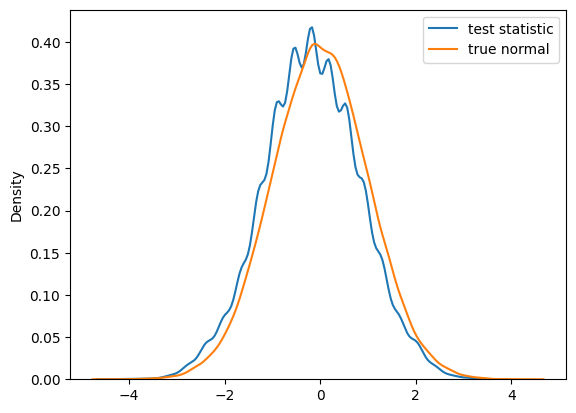

In [14]:
test_statistic_distribution = (
    ((pbar - P) - (1/(2*SAMPLE_SIZE))) / ((P * (1-P))/SAMPLE_SIZE)**0.5
)

true_normal_distribution = np.random.normal(0, 1, 10_0000)
print(test_statistic_distribution.mean())
print(test_statistic_distribution.var())
sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_normal_distribution, label='true normal')
plt.legend()
# test_statistic_distribution